# [MO443] Trabalho de Esteganografia - Trabalho 01

> Trabalho realizado por Maria Angélica Krüger Miranda {197698}
>
> **Objetivo:** Aplicar a transformada rápida de Fourier (FFT) em imagens digitais, explorando o processamento no domínio da frequência.

## Introdução

In [1]:
# Importações das bibliotecas
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mostrar_imagem(imagem, titulo, colorMap = None):
    if colorMap is not None:
        plt.imshow(imagem, cmap=colorMap)
    else:
        plt.imshow(imagem)
    plt.title(titulo)
    plt.show()

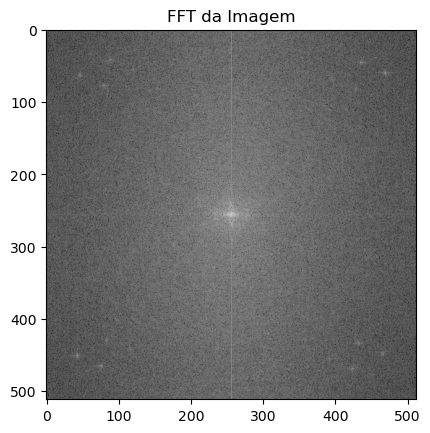

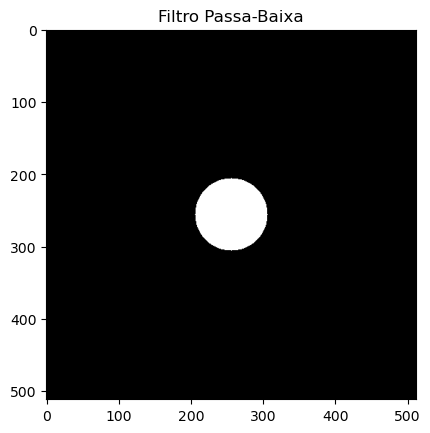

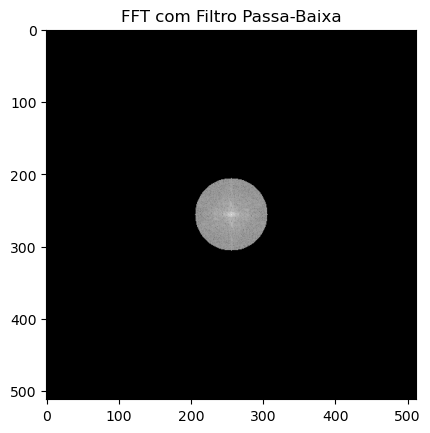

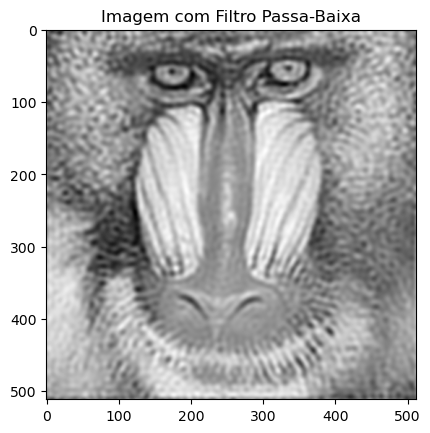

In [43]:
# Ler imagem e deixá-la em escala de cinza
# Imagem de tamanho 512x512
img = cv2.imread('baboon.png', cv2.IMREAD_GRAYSCALE)  
#mostrar_imagem(img, 'Imagem Original', 'gray')

# Aplicar a FFT na imagem e centralizar o espectro de frequência
img_fft = np.fft.fftshift(np.fft.fft2(img))
mag_espectro_fourier = np.log(np.abs(img_fft)+1) # soma 1 para evitar log(0)
# print(mag_espectro_fourier)
# print("Max: ", np.max(mag_espectro_fourier))
# print(mag_espectro_fourier[img.shape[0]//2][img.shape[0]//2])
mostrar_imagem(mag_espectro_fourier, 'FFT da Imagem', 'gray')

# Criar as máscaras para os diferentes filtros
# Filtro passa-baixa (512*512)
filtro_pb = np.zeros(img.shape) 
cv2.circle(filtro_pb, (img.shape[0]//2, img.shape[1]//2), 50, 1, -1)
mostrar_imagem(filtro_pb, 'Filtro Passa-Baixa','gray')

# Aplicar o filtro entre o espectro de frequência e a máscara
img_fft_pb = np.multiply(img_fft, filtro_pb)
#print(img_fft_pb+1)
mostrar_imagem(np.log(np.abs(img_fft_pb)+1), 'FFT com Filtro Passa-Baixa', 'gray')

# Aplicar a transformada inversa de Fourier
img_pb = np.abs(np.fft.ifft2(np.fft.ifftshift(img_fft_pb)))

mostrar_imagem(img_pb, 'Imagem com Filtro Passa-Baixa', 'gray')

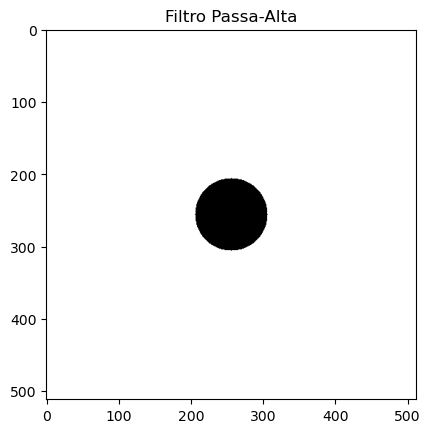

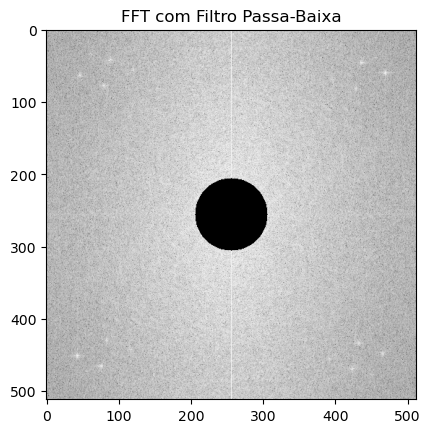

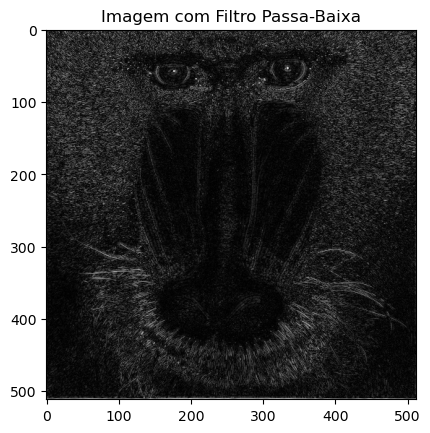

In [48]:
# Filtragram passa-alta
filtro_pa = np.ones(img.shape)
cv2.circle(filtro_pa, (img.shape[0]//2, img.shape[1]//2), 50, 0, -1)
mostrar_imagem(filtro_pa, 'Filtro Passa-Alta', 'gray')

# Aplicar o filtro entre o espectro de frequência e a máscara
img_fft_pa = np.multiply(img_fft, filtro_pa)
#print(img_fft_pb+1)
mostrar_imagem(np.log(np.abs(img_fft_pa)+1), 'FFT com Filtro Passa-Baixa', 'gray')

# Aplicar a transformada inversa de Fourier
img_pa = np.abs(np.fft.ifft2(np.fft.ifftshift(img_fft_pa)))

mostrar_imagem(img_pa, 'Imagem com Filtro Passa-Baixa', 'gray')

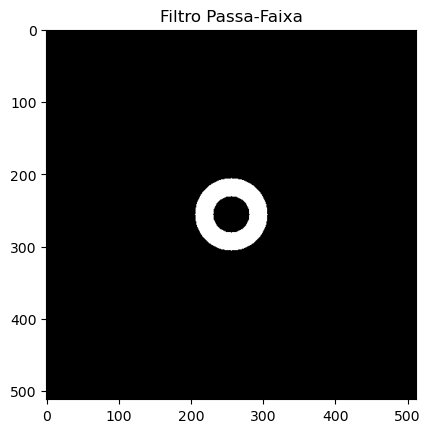

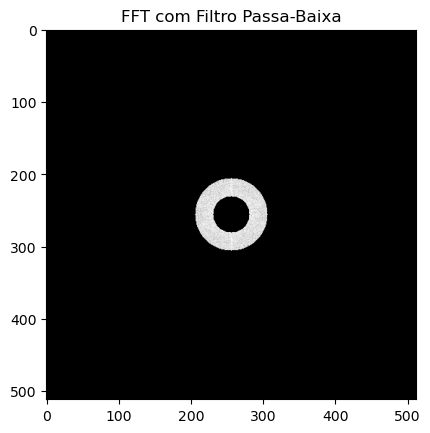

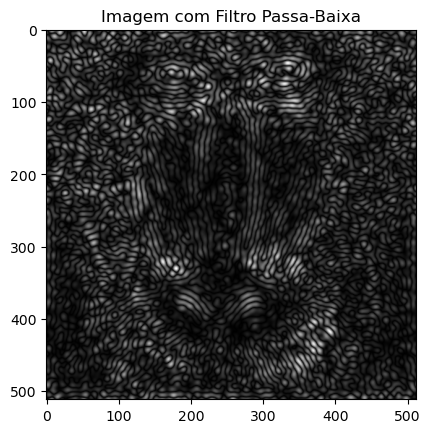

In [50]:
# filtro passa-faixa
filtro_pf = np.zeros(img.shape)
cv2.circle(filtro_pf, (img.shape[0]//2, img.shape[1]//2), 50, 1, -1)
cv2.circle(filtro_pf, (img.shape[0]//2, img.shape[1]//2), 25, 0, -1)
mostrar_imagem(filtro_pf, 'Filtro Passa-Faixa', 'gray')

# Aplicar o filtro entre o espectro de frequência e a máscara
img_fft_pf = np.multiply(img_fft, filtro_pf)
#print(img_fft_pb+1)
mostrar_imagem(np.log(np.abs(img_fft_pf)+1), 'FFT com Filtro Passa-Baixa', 'gray')

# Aplicar a transformada inversa de Fourier
img_pf = np.abs(np.fft.ifft2(np.fft.ifftshift(img_fft_pf)))

mostrar_imagem(img_pf, 'Imagem com Filtro Passa-Baixa', 'gray')

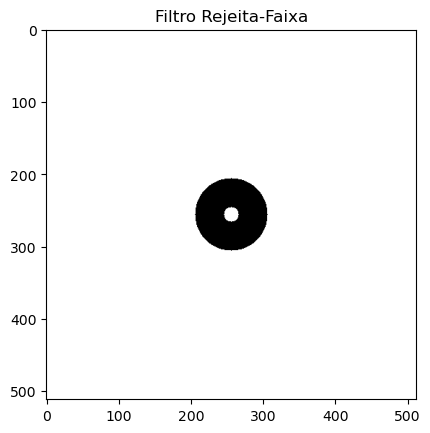

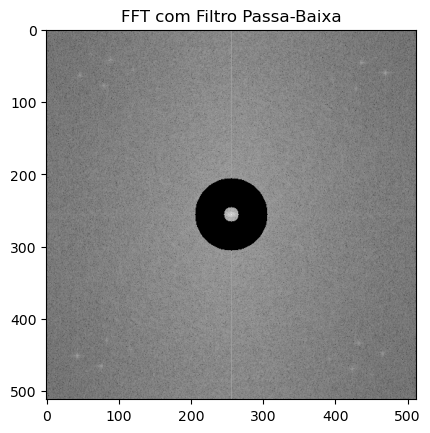

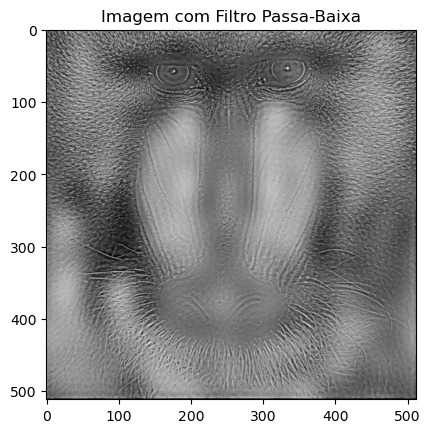

In [54]:
# Filtro rejeita-faixa
filtro_rf = np.ones(img.shape)
cv2.circle(filtro_rf, (img.shape[0]//2, img.shape[1]//2), 50, 0, -1)
cv2.circle(filtro_rf, (img.shape[0]//2, img.shape[1]//2), 10, 1, -1)
mostrar_imagem(filtro_rf, 'Filtro Rejeita-Faixa', 'gray')

# Aplicar o filtro entre o espectro de frequência e a máscara
img_fft_rf = np.multiply(img_fft, filtro_rf)
#print(img_fft_pb+1)
mostrar_imagem(np.log(np.abs(img_fft_rf)+1), 'FFT com Filtro Passa-Baixa', 'gray')

# Aplicar a transformada inversa de Fourier
img_rf = np.abs(np.fft.ifft2(np.fft.ifftshift(img_fft_rf)))

mostrar_imagem(img_rf, 'Imagem com Filtro Passa-Baixa', 'gray')

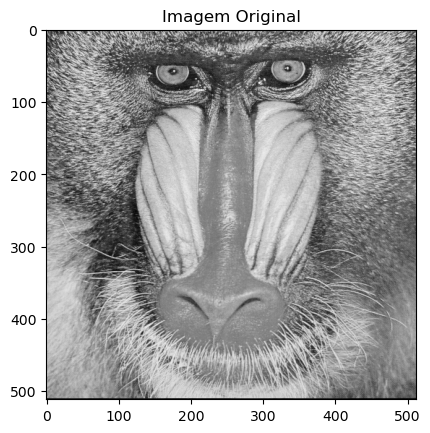

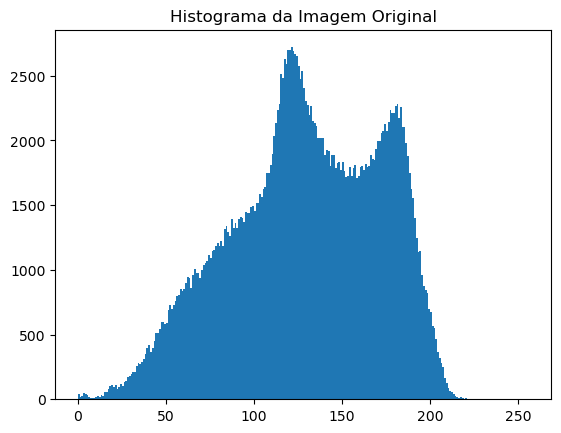

33846792.0


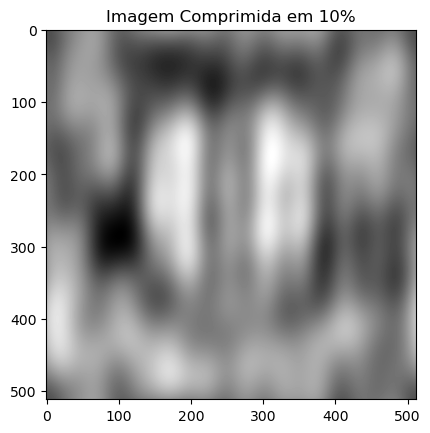

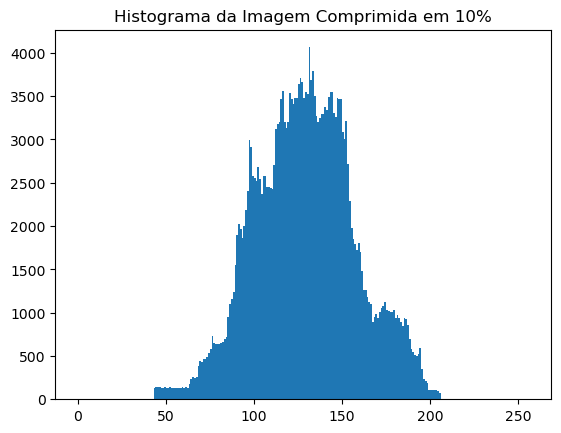

In [66]:
# Compressão em imagens
mostrar_imagem(img, 'Imagem Original', 'gray')

# histograma da imagem original
plt.hist(img.ravel(),256,[0,256])
plt.title('Histograma da Imagem Original')
plt.show()

# fft na imagem e pegar a sua magnitude
img_fft = np.fft.fftshift(np.fft.fft2(img))

#  remoçao de coeficientes cujas magnitudes sao menores do que um determinado limiar (atribuindo-se valores iguais a 0 a eles)
img_fft_compressed = img_fft.copy()
print(np.max(np.abs(img_fft_compressed)))
img_fft_compressed[np.abs(img_fft_compressed) < 0.01*np.max(np.abs(img_fft_compressed))] = 0

# Aplicar a transformada inversa de Fourier
img_compressed = np.abs(np.fft.ifft2(np.fft.ifftshift(img_fft_compressed)))

mostrar_imagem(img_compressed, 'Imagem Comprimida em 10%', 'gray')

# histograma comprimida
plt.hist(img_compressed.ravel(),256,[0,256])
plt.title('Histograma da Imagem Comprimida em 10%')
plt.show()


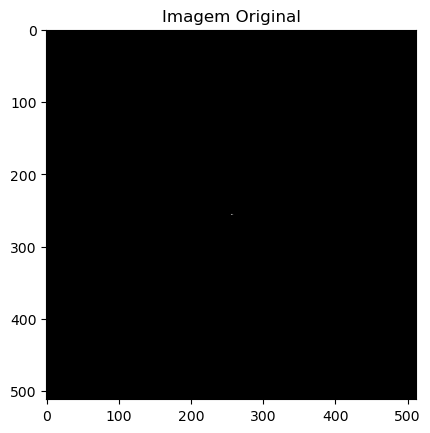

In [116]:
ig = np.zeros((512,512))
ig[256][256] = 512*512*1
ig[256][256+1] = 512*512*0.5
ig[256][256-1] = 512*512*0.5
ig[256][256+2] = 512*512*0.5
ig[256][256-2] = 512*512*0.5



mostrar_imagem(ig, 'Imagem Original', 'gray')

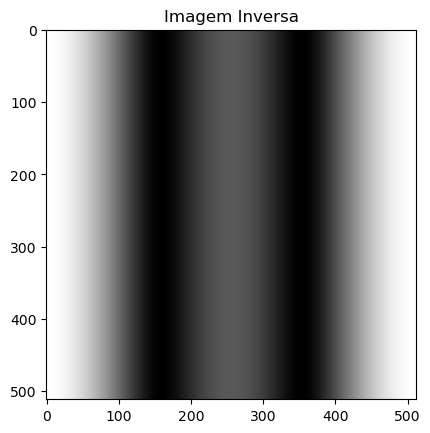

[[2.         1.99989647 1.99958588 ... 1.99906829 1.99958588 1.99989647]
 [2.         1.99989647 1.99958588 ... 1.99906829 1.99958588 1.99989647]
 [2.         1.99989647 1.99958588 ... 1.99906829 1.99958588 1.99989647]
 ...
 [2.         1.99989647 1.99958588 ... 1.99906829 1.99958588 1.99989647]
 [2.         1.99989647 1.99958588 ... 1.99906829 1.99958588 1.99989647]
 [2.         1.99989647 1.99958588 ... 1.99906829 1.99958588 1.99989647]]
2.0
0.467736171490699


In [117]:
ig_inversa = np.abs(np.fft.ifft2(np.fft.ifftshift(ig)))

mostrar_imagem(ig_inversa, 'Imagem Inversa', 'gray')
print(ig_inversa)
print(np.max(ig_inversa))
print(np.min(ig_inversa))